In [1]:
import pandas as pd
import os
import numpy as np

In [2]:
###merge of 12 months of data###
files = [file for file in os.listdir('E:\Projects\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data')]

In [3]:
all_data = pd.DataFrame()
for file in files:
    df= pd.read_csv('E:\Projects\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data/'+ file)
    all_data = pd.concat([all_data ,df]) 
    

In [4]:
all_data.to_csv('all_data.csv', index=None)
### to validate if our data is merged ###

In [5]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Cleaning the Data of null values


In [6]:
na = all_data[all_data.isna().any(axis=1) ]
na.head()
# now drop the NA
all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### still we have some duplicate columns which have name as Order Date in column

In [7]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [8]:
### Adding Month Column in Database
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### Making Sales Data column

In [9]:
###converting Quantity and price from str to int
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])

all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

In [10]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


### 1st Analysis - Best Month by sales (Visualization)

In [11]:
import matplotlib.pyplot as plt

result = all_data.groupby('Month').sum()


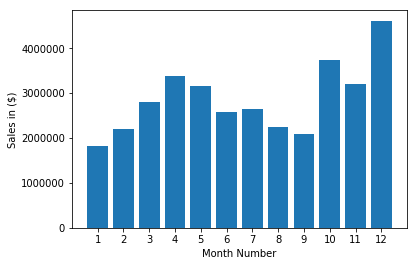

In [12]:
month = range(1,13)
plt.bar(month, result['Sales'])
plt.xticks(month)
plt.xlabel('Month Number')
plt.ylabel('Sales in ($)')
plt.show()

### Analysis 2 - Which city has highest number of sales?

In [13]:
#creating the city column from Purchase address#
def city(address):
    return address.split(',')[1]
def state(address):
    return address.split(',')[2].split(' ')[1]
all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{city(x)} ({state(x)})")
all_data.head()
# But as there might be duplicate cities so we are also including state



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [14]:
result1 = all_data.groupby('City').sum()
print(result1)

                     Quantity Ordered    Price Each   Month         Sales
City                                                                     
 Atlanta (GA)                   16602  2.779908e+06  104794  2.795499e+06
 Austin (TX)                    11153  1.809874e+06   69829  1.819582e+06
 Boston (MA)                    22528  3.637410e+06  141112  3.661642e+06
 Dallas (TX)                    16730  2.752628e+06  104620  2.767975e+06
 Los Angeles (CA)               33289  5.421435e+06  208325  5.452571e+06
 New York City (NY)             27932  4.635371e+06  175741  4.664317e+06
 Portland (ME)                   2750  4.471893e+05   17144  4.497583e+05
 Portland (OR)                  11303  1.860558e+06   70621  1.870732e+06
 San Francisco (CA)             50239  8.211462e+06  315520  8.262204e+06
 Seattle (WA)                   16553  2.733296e+06  104941  2.747755e+06


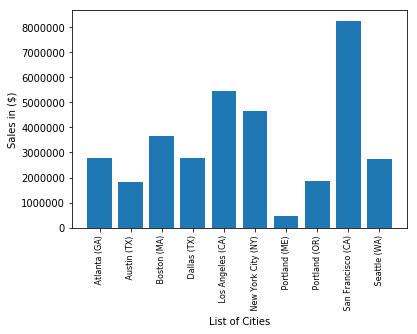

In [15]:
# to make the order of Data in same format we used list comprehension
cities = [city for city , df in all_data.groupby('City')]
plt.bar(cities, result1['Sales'])
plt.xticks(cities, rotation='vertical' , size=8)
plt.xlabel('List of Cities')
plt.ylabel('Sales in ($)')
plt.show()

### Analysis 3 -  What time is suitable to display advertisment

In [16]:
# to do this first we need to convert order date in Datetime format
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute

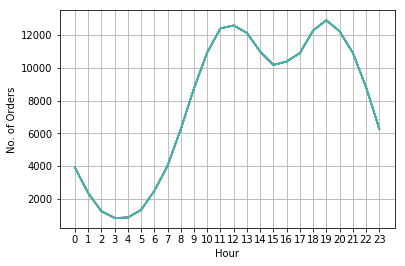

In [19]:
# after creating 2 column now we need to plot
import matplotlib.pyplot as plt

hours = [hour for hour, df in all_data.groupby('Hour')]
plt.plot(hours , all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('No. of Orders')
plt.grid()
plt.show()

In [20]:
# by this analysis 11 am and 7 pm is the peak time and suitable to show advertisment


### Analysis 4 :- What products are most often sold together

In [26]:
# for this we need need to find out what 2 products are sold together the most and those 2 products have same duplicate ID

product = all_data[all_data['Order ID'].duplicated(keep=False)]
#this will give us all the duplicated items & now create new column which have those values
product.head(20)
product['Grouped'] = product.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
# now there is some duplicated values in it so to clear it we need to drop the duplicates
product = product[['Order ID','Grouped']].drop_duplicates()
product.head()

#Now we need to count these items


C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [31]:
from itertools import combinations
from collections import Counter
count = Counter()

for row in product['Grouped']:
    row_data = row.split(',')
    count.update(combinations(row_data,2))
for key , value in count.most_common(10):
    print(key,value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### Analysis 5 : What product has been sold the most and Why?

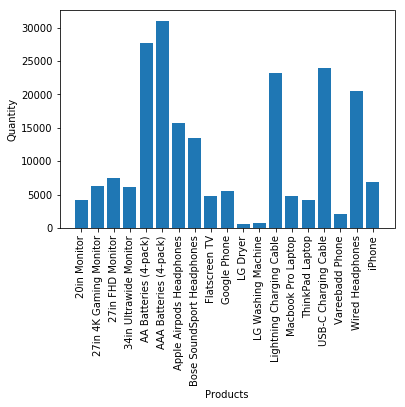

In [34]:
products_sold = all_data.groupby('Product')
quantity = products_sold.sum()['Quantity Ordered']

product = [x for x,df in products_sold]
plt.bar(product , quantity)
plt.xticks(product , rotation = 'vertical')
plt.xlabel('Products')
plt.ylabel('Quantity')
plt.show()


In [ ]:
# but to confirm the data and find the relations of this data with other , now we are overlaping the no. of products with the price of that quantity

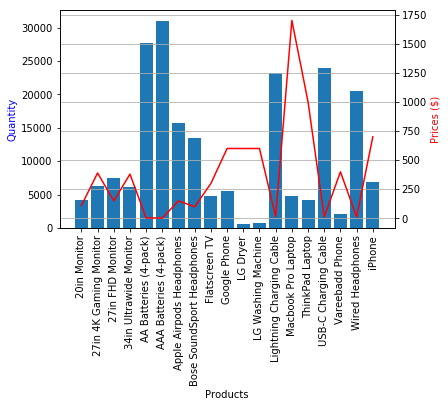

In [43]:
prices = all_data.groupby('Product').mean()['Price Each']

# making subplot to make these two graph overlap
fig , ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(product , quantity)
ax2.plot(product , prices , color='r')
ax1.set_xlabel('Products')
ax1.set_ylabel('Quantity', color='b')
ax2.set_ylabel('Prices ($)',color ='r')
ax1.set_xticklabels(product , rotation='vertical')
plt.grid()
plt.show()
